In [91]:
import pandas as pd
import os
import caselawnet
import sqlalchemy
%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
filepath =  '/media/sf_VBox_Shared/CaseLaw/2018-01-29-lido/derived'

In [6]:
cases_links = pd.read_csv(os.path.join(filepath, 'case_to_case_lx_links.csv'))

In [8]:
cases_links.head()

,link_id,source,target
0,http://localhost:8984/bigdata/namespace/Regell...,http://linkeddata.overheid.nl/terms/jurisprude...,http://linkeddata.overheid.nl/terms/jurisprude...
1,http://localhost:8984/bigdata/namespace/Regell...,http://linkeddata.overheid.nl/terms/jurisprude...,http://linkeddata.overheid.nl/terms/jurisprude...
2,http://localhost:8984/bigdata/namespace/Regell...,http://linkeddata.overheid.nl/terms/jurisprude...,http://linkeddata.overheid.nl/terms/jurisprude...
3,http://localhost:8984/bigdata/namespace/Regell...,http://linkeddata.overheid.nl/terms/jurisprude...,http://linkeddata.overheid.nl/terms/jurisprude...
4,http://localhost:8984/bigdata/namespace/Regell...,http://linkeddata.overheid.nl/terms/jurisprude...,http://linkeddata.overheid.nl/terms/jurisprude...


In [60]:
case_lido_ids = list(set(cases_links['source']).union(set(cases_links['target'])))
case_ecli = [s.split('/')[-1] for s in case_lido_ids]

In [68]:
cases_df = pd.DataFrame({'lido_id': case_lido_ids, 'ecli': case_ecli})
cases_df.head()

,ecli,lido_id
0,ECLI:CE:ECHR:2007:0301JUD000593502,http://linkeddata.overheid.nl/terms/jurisprude...
1,ECLI:NL:RBSGR:2012:BV9643,http://linkeddata.overheid.nl/terms/jurisprude...
2,ECLI:NL:HR:2008:BB8644,http://linkeddata.overheid.nl/terms/jurisprude...
3,ECLI:NL:RBGEL:2015:3159,http://linkeddata.overheid.nl/terms/jurisprude...
4,ECLI:NL:RVS:2007:BA1155,http://linkeddata.overheid.nl/terms/jurisprude...


In [82]:
meta_df = pd.DataFrame([e.split(':')[1:4] for e in case_ecli], columns=['country', 'court', 'year'])
meta_df.head()

,country,court,year
0,CE,ECHR,2007
1,NL,RBSGR,2012
2,NL,HR,2008
3,NL,RBGEL,2015
4,NL,RVS,2007


In [85]:
cases_df = pd.concat([cases_df, meta_df], axis=1)

In [86]:
cases_df.head()

,ecli,lido_id,country,court,year
0,ECLI:CE:ECHR:2007:0301JUD000593502,http://linkeddata.overheid.nl/terms/jurisprude...,CE,ECHR,2007
1,ECLI:NL:RBSGR:2012:BV9643,http://linkeddata.overheid.nl/terms/jurisprude...,NL,RBSGR,2012
2,ECLI:NL:HR:2008:BB8644,http://linkeddata.overheid.nl/terms/jurisprude...,NL,HR,2008
3,ECLI:NL:RBGEL:2015:3159,http://linkeddata.overheid.nl/terms/jurisprude...,NL,RBGEL,2015
4,ECLI:NL:RVS:2007:BA1155,http://linkeddata.overheid.nl/terms/jurisprude...,NL,RVS,2007


In [87]:
cases_df.country.value_counts()

NL    279633
EU      5082
CE      3651
Name: country, dtype: int64

In [90]:
cases_df.court.value_counts()[:20]

RVS      39098
CRVB     38511
HR       37496
PHR      20506
GHAMS    11934
RBAMS    11227
GHSHE     9087
RBSGR     8737
RBDHA     7828
RBROT     6872
GHARL     6243
RBARN     6122
GHARN     5360
CBB       5052
C         4925
RBUTR     4271
GHSGR     4113
RBGEL     3991
RBHAA     3816
ECHR      3651
Name: court, dtype: int64

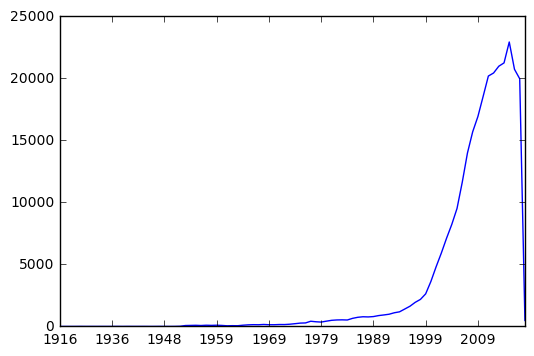

In [98]:
cases_df.year.value_counts(sort=False).sort_index().plot()

In [56]:
dbpath = 'sqlite:////media/sf_VBox_Shared/CaseLaw/caselaw2018.db'
session = caselawnet.dbutils.get_session(adress=dbpath)

In [57]:
caselawnet.enrich_eclis(['ECLI:NL:PHR:1984:AC8323'], rootpath='/media/sf_VBox_Shared/CaseLaw/OpenDataUitspraken/', db_session=session)

Retrieved ECLI:NL:PHR:1984:AC8323 from database


[{'abstract': '',
  'articles': [],
  'count_annotation': 0,
  'count_version': 0,
  'creator': 'http://standaarden.overheid.nl/owms/terms/Parket_bij_de_Hoge_Raad',
  'date': '1984-02-28',
  'ecli': 'ECLI:NL:PHR:1984:AC8323',
  'id': 'http://deeplink.rechtspraak.nl/uitspraak?id=ECLI:NL:PHR:1984:AC8323',
  'subject': '',
  'title': ''}]